# Demo v2

In [1]:
%load_ext autoreload
%autoreload 2

### Query sampling
#### we sample queries to calculate weights until we reach an average error less than $\epsilon$

In [25]:
from tuple_weight_calculator import TupleWeightCalculator

max_iters = 10000
epsilon = 0.0001

tuple_weight_calculator = TupleWeightCalculator(convergence_metric='average')
weights = tuple_weight_calculator.get_weights(max_iters, epsilon)
weights

============= start iteration =============
Elapsed time: 0.1812 seconds
Saving checkpoint weights.npy to: [./checkpoints/2]
============= start iteration =============
Elapsed time: 0.6503 seconds
Saving checkpoint weights.npy to: [./checkpoints/2]
============= start iteration =============
iteration: 3 has reached diff to previous of: 0.02014!
Elapsed time: 0.4297 seconds
Saving checkpoint weights.npy to: [./checkpoints/2]
============= start iteration =============
iteration: 4 has reached diff to previous of: 0.01366!
Elapsed time: 0.4898 seconds
Saving checkpoint weights.npy to: [./checkpoints/2]
============= start iteration =============
iteration: 5 has reached diff to previous of: 0.01075!
Elapsed time: 0.3247 seconds
Saving checkpoint weights.npy to: [./checkpoints/2]
============= start iteration =============
iteration: 6 has reached diff to previous of: 0.00950!
Elapsed time: 0.3733 seconds
Saving checkpoint weights.npy to: [./checkpoints/2]
============= start iteration 

array([0.00116446, 0.00112383, 0.00105021, 0.00099524, 0.00113673,
       0.0010569 , 0.00060756, 0.00105977, 0.00114916, 0.00092545,
       0.00107459, 0.00108606, 0.00108367, 0.00113912, 0.00104113,
       0.00111857, 0.00092545, 0.00099285, 0.0011396 , 0.00094027,
       0.00107985, 0.00072564, 0.00090011, 0.00108176, 0.00106168,
       0.00106551, 0.00075958, 0.0008657 , 0.00085614, 0.00059083,
       0.00114964, 0.00087908, 0.00085614, 0.00094314, 0.00087287,
       0.00106647, 0.00112431, 0.00103778, 0.00076388, 0.00103157,
       0.00062669, 0.00094792, 0.00113004, 0.00064867, 0.00108989,
       0.00114151, 0.00116972, 0.00064724, 0.0010569 , 0.00109371,
       0.0009613 , 0.00091159, 0.00099237, 0.0010875 , 0.00105977,
       0.00100671, 0.00090776, 0.00083606, 0.00103492, 0.00096512,
       0.00074476, 0.00115872, 0.00106981, 0.00079351, 0.00108272,
       0.00107746, 0.00104639, 0.00101006, 0.00114486, 0.00073185,
       0.00088195, 0.00090537, 0.00108224, 0.00100767, 0.00093

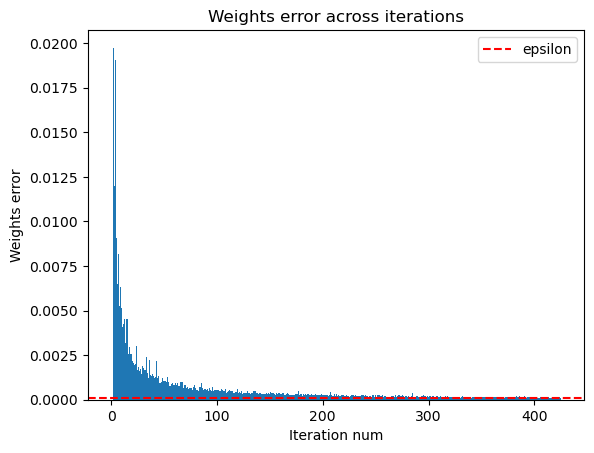

In [3]:
import matplotlib.pyplot as plt
from graphs_manager_v2 import GraphsManager
from tuple_weight_calculator import GRAPH_NAME

weightsErrorGraph = GraphsManager.get_graph(GRAPH_NAME)

plt.bar(weightsErrorGraph.get_x_axis(), weightsErrorGraph.get_y_axis(), 1.0)
plt.xlabel("Iteration num")
plt.ylabel("Weights error")
plt.title("Weights error across iterations")
plt.axhline(y=epsilon, color='r', linestyle='--', label='epsilon')
plt.legend()
plt.show()

### Distance calculation
#### we calculate a distance matrix $D$ with $D_{ij}=dist(T[i],T[j])$

In [5]:
from tuple_distance_calculator import TupleDistanceCalculator

tuple_distance_calculator = TupleDistanceCalculator()
distance_matrix = tuple_distance_calculator.calculate_distance_matrix()
distance_matrix

============= start iteration =============
Starting tuples with ids: (0,...,999) x (0,...,999)
Finished tuples with ids: (0,...,999) x (0,...,999)
Elapsed time: 7.0413 seconds
Saving checkpoint distance_matrix.npy to: [./checkpoints/2]
total time elapsed: 7.04131 seconds


array([[0.        , 0.4367599 , 0.45355706, ..., 0.43876847, 0.48539486,
        0.47708749],
       [0.4367599 , 0.        , 0.45169225, ..., 0.42265785, 0.47914486,
        0.46151231],
       [0.45355706, 0.45169225, 0.        , ..., 0.45346558, 0.46775743,
        0.44658276],
       ...,
       [0.43876847, 0.42265785, 0.45346558, ..., 0.        , 0.48448928,
        0.47498787],
       [0.48539486, 0.47914486, 0.46775743, ..., 0.48448928, 0.        ,
        0.45218615],
       [0.47708749, 0.46151231, 0.44658276, ..., 0.47498787, 0.45218615,
        0.        ]])

### Lazy Greedy Sampler
#### we run a lazy greedy sampling utilizing $D$ to maximize: $gain(S)=\sum_{t\in T}{w(t)min_{s\in S} {dist(t,s)}}$

In [27]:
from lazy_greedy_sampler import LazyGreedySampler

lazy_greedy_sampler = LazyGreedySampler(weights, distance_matrix)
sample_idx = lazy_greedy_sampler.run(100)
sample_idx.sort()

============= start iteration =============
Added: [303] to sample, new gain: [0.5581], remaining budget: [99]
Saving checkpoint lazy_greedy_metadata.pkl to: [./checkpoints/2]
Saving checkpoint lazy_greedy_sample.pkl to: [./checkpoints/2]
Elapsed time: 0.7098 seconds
============= start iteration =============
Added: [245] to sample, new gain: [0.5722], remaining budget: [98]
Saving checkpoint lazy_greedy_metadata.pkl to: [./checkpoints/2]
Saving checkpoint lazy_greedy_sample.pkl to: [./checkpoints/2]
Elapsed time: 0.4965 seconds
============= start iteration =============
Added: [973] to sample, new gain: [0.5840], remaining budget: [97]
Saving checkpoint lazy_greedy_metadata.pkl to: [./checkpoints/2]
Saving checkpoint lazy_greedy_sample.pkl to: [./checkpoints/2]
Elapsed time: 0.5394 seconds
============= start iteration =============
Added: [46] to sample, new gain: [0.5942], remaining budget: [96]
Saving checkpoint lazy_greedy_metadata.pkl to: [./checkpoints/2]
Saving checkpoint laz

In [28]:
from config_manager_v2 import ConfigManager
from data_access_v2 import DataAccess

schema = ConfigManager.get_config('queriesConfig.schema')
table = ConfigManager.get_config('queriesConfig.table')
pivot = ConfigManager.get_config('queriesConfig.pivot')

DataAccess.select_to_df(f'SELECT * FROM {schema}.{table} WHERE {pivot} IN ({",".join([str(idx) for idx in sample_idx])})')

,_id,bikeid,start_time,duration_minutes,start_station_name,end_station_name,start_latitude,start_longitude,end_latitude,end_longitude
0,23,228,2017-03-22 16:23:02,75,City Hall / Lavaca & 2nd,City Hall / Lavaca & 2nd,30.26476,-97.74678,30.26476,-97.74678
1,46,283,2014-01-20 19:12:00,2,Capitol Station / Congress & 11th,8th & Congress,30.27260,-97.74127,30.26980,-97.74186
2,70,414,2015-07-04 19:12:00,26,Barton Springs @ Kinney Ave,Barton Springs @ Kinney Ave,30.26200,-97.76118,30.26200,-97.76118
3,81,513,2016-08-27 17:22:03,39,Convention Center / 3rd & Trinity,Convention Center / 3rd & Trinity,30.26426,-97.74023,30.26426,-97.74023
4,86,541,2017-07-11 18:42:46,4,3rd & West,City Hall / Lavaca & 2nd,30.26780,-97.75189,30.26476,-97.74678
...,...,...,...,...,...,...,...,...,...,...
95,966,993,2016-11-12 14:22:58,9,Zilker Park,Barton Springs @ Kinney Ave,30.26590,-97.76822,30.26200,-97.76118
96,973,52,2014-06-25 21:12:00,2,Riverside @ S. Lamar,Pfluger Bridge @ W 2nd Street,30.26446,-97.75665,30.26717,-97.75484
97,984,344,2014-06-21 16:12:00,18,Davis at Rainey Street,Trinity & 6th Street,30.26019,-97.73845,30.26735,-97.73933
98,988,298,2017-07-29 16:10:35,42,Zilker Park,Zilker Park,30.26590,-97.76822,30.26590,-97.76822
